In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio 

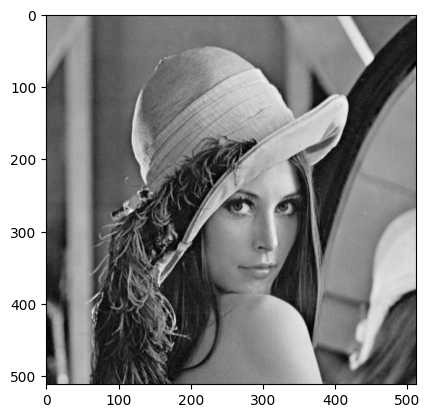

In [38]:
# image_path = "hotairbaloon.jpg"
image_path ="lena.png"
image = Image.open(image_path).convert("L")
image_array = np.array(image)

plt.imshow(image_array, cmap='gray')
plt.show()

In [39]:
def apply_laplacian(image,
                    laplacian_filter=np.array([[0, -1, 0],
                                 [-1, 4, -1],
                                 [0, -1, 0]])):
    filtered_image = convolve2d(image, laplacian_filter, mode='same')
    
    # Normalize the pixel values to the range [0, 255]
    filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image))
    filtered_image *= 255
    
    filtered_image = filtered_image.astype(int)
    return filtered_image

filtered_image = apply_laplacian(image)

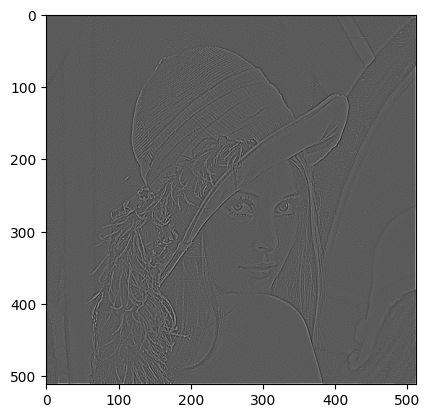

83


In [40]:
plt.imshow(filtered_image, cmap='gray')
plt.show()
print(filtered_image[100][100])

In [41]:
def sharpen(image,filtered_image):
    # Add the filtered image to the original image
    sharpened_image = image + filtered_image

    # Normalize the sharpened image to ensure pixel values are within the range [0, 255]
    sharpened_image = (sharpened_image - np.min(sharpened_image)) / (np.max(sharpened_image) - np.min(sharpened_image))
    sharpened_image *= 255

    # Convert the pixel values to integers
    sharpened_image = sharpened_image.astype(int)

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image in the first subplot
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Display the sharpened image in the second subplot
    axs[1].imshow(sharpened_image, cmap='gray')
    axs[1].set_title('Sharpened Image')
    axs[1].axis('off')

    # Show the figure
    plt.show()

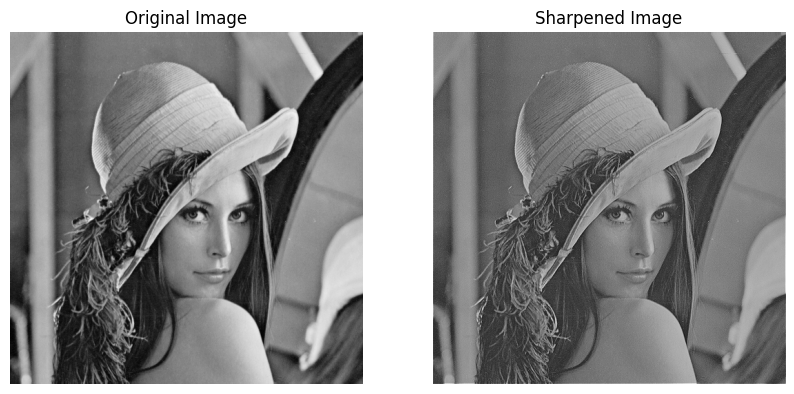

In [42]:
sharpen(image_array,filtered_image)

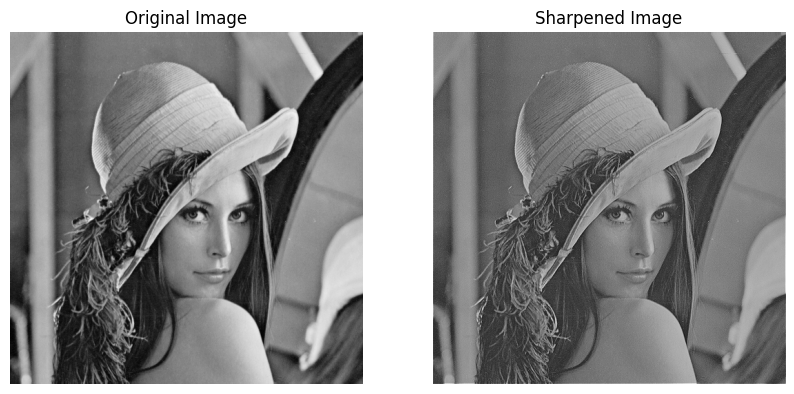

In [43]:
sharpen(image_array,filtered_image)

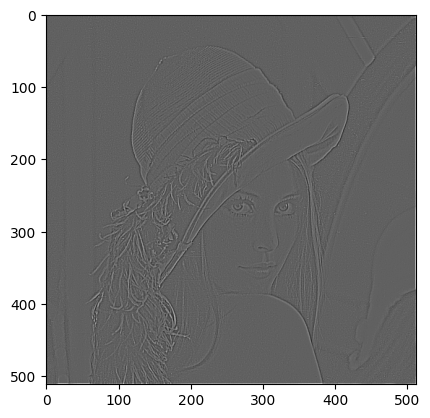

In [44]:
filter2 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
filtered_image2=apply_laplacian(image, filter2)
plt.imshow(filtered_image2, cmap='gray')
plt.show()


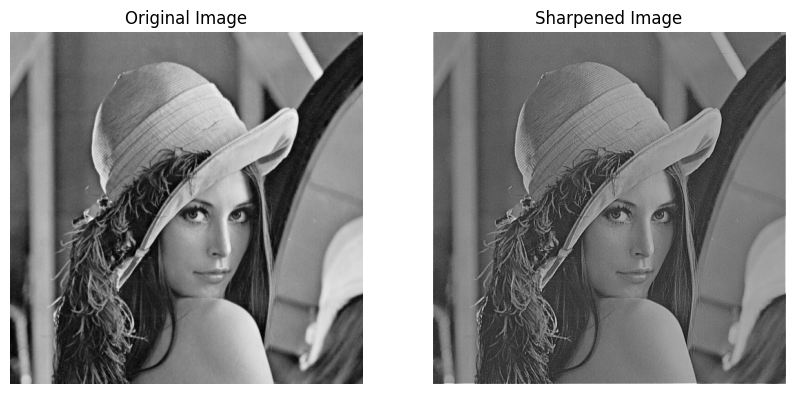

In [45]:
sharpen(image_array,filtered_image2)